In [28]:
from IPython.display import HTML
HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/Youtube_2018.gif">')

# Analiza YouTube trendova

   Platforma YouTube, s kojom smo vjerojatno svi dobro poznati (pogotovo kada treba naučiti puno toga u malo vremena), vodi dnevnu evidenciju o videima na Trending Pageu. Kako YouTube odlučuje koji videi će biti taj dan na Tranding Pageu? Sigurno postoji kompleksan algoritam na koji utječe mnogo faktora.

Mi ćemo u ovom eseju proučavati moguće korelacije između broja viewova, likeova, dislikeova i broja komentara na videima koji su bili na Tranding Pageu. Također, bavit ćemo se proučavanjem početcima jednih od najvećih neslužbenih *natjecanja* na YouTubeu, PewDiePie vs. T-Series. Dva velika kanala koja su se borila za prvo mjesto po broju pretplatnika, no više o ovoj zanimljivoj *borbi* nešto kasnije.

Trending Page se razlikuje od države do države. U nastavku ćemo učitati i analizirati podatke iz Velike Britanije (GB), Indije (IN) i Francuske (FR). Podaci su iz 2017. i 2018. godine.

In [1]:
import pandas as pd
podaciGB = pd.read_csv('GBvideos.csv', encoding = 'utf-8')
podaciGB.head()

video_id trending_date  \
0  Jw1Y-zhQURU      17.14.11   
1  3s1rvMFUweQ      17.14.11   
2  n1WpP7iowLc      17.14.11   
3  PUTEiSjKwJU      17.14.11   
4  rHwDegptbI4      17.14.11   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id              publish_time  \
0                  John Lewis           26  2017-11-10T07:38:29.000Z   
1         Saturday Night Live           24  2017-11-12T06:24:44.000Z   
2                  EminemVEVO           10  2017-11-10T17:00:03.000Z   
3  Salford City Football Club           17  2017-11-13T02:30:38.000Z   
4            Cute Girl Videos           25  2017-11-13T01:45:13.000Z   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   
2     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
3        12             37  https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg   
4         2             30  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Click here to continue the story and make your...  
1  Musical guest Taylor Swift performs …Ready for...  
2  Eminem's new track Walk on Water ft. Beyoncé i...  
3  Salford drew 4-4 against the Class of 92 and F...  
4  Dashcam captures truck's near miss with child ...

Ovaj dataset je dosta velik sam po sebi i s većinom kategorija ne možemo baratati niti ih analizirati. Ostavimo samo `trending_date`, `channel_title`, `category_id`, `views`, `likes`, `dislikes` i `comment_count`.

In [2]:
podaciGB.drop(['video_id', 'title', 'publish_time', 'tags','thumbnail_link', 'comments_disabled','ratings_disabled','video_error_or_removed','description'],axis=1,inplace=True)
podaciGB.head()

trending_date               channel_title  category_id     views   likes  \
0      17.14.11                  John Lewis           26   7224515   55681   
1      17.14.11         Saturday Night Live           24   1053632   25561   
2      17.14.11                  EminemVEVO           10  17158579  787420   
3      17.14.11  Salford City Football Club           17     27833     193   
4      17.14.11            Cute Girl Videos           25      9815      30   

   dislikes  comment_count  
0     10247           9479  
1      2294           2757  
2     43420         125882  
3        12             37  
4         2             30

Prilično je jasno što koji `Series` predstavlja osim možda `category_id`. To je [kategorija](https://gist.github.com/dgp/1b24bf2961521bd75d6c) u koju spada video kao što su na primjer *Music*, *Entertainment*, *Howto & Style* i slično. Njih ima ukupno $43$, no kao što možemo očekivati, neke su puno sklonije biti na `Tranding Pageu`. Je li zastupljenost pojedine kategorije podjednaka u svakoj državi? To ćemo istražiti nešto kasnije.

Kako imamo jako puno podataka, s puno različitih tipova, na prvu nije jasno kako dalje prostupiti problemu. Naredba `describe` nam neće dati mnogo korisnih informacija. Postoji ozbiljniji modul koji Python nudi, `Pandas Profiling`. Njega je potrebno instalirati.

Više o samoj instalaciji na sljedećem [linku](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3).

Sama naredba se izvršava dosta dugo, no ona vraća vrlo detaljnu analizu kao što ćete vidjeti u nastavku.

In [3]:
from pandas_profiling import ProfileReport
ProfileReport(podaciGB)

Matplotlib is building the font cache; this may take a moment.


## Komentar na  analizu

#### Channel title

Dobivamo neka upozorenja na dataset. Jedan od warninga je `high cardinality` pojedinih kategorija. Analizirajmo `channel_title`. Bilo bi neobično kada bi na trendingu uvijek bili videi istih kanala zato ima smisla što se javlja warning za taj stupac. Naravno, ne bismo mogli donijeti nikakav korisni zaključak da smo imali previše različitih kanala.

Ako pritisnemo na `Toggle details` (desni kut ispod svakog dijela), dobit ćemo puno detaljniju analizu.

Ono što je zanimljivo je popis kanala koji su često na Trending Pageu. Prva mjesta zauzimaju Late Night i Talk Show emisije. Također, ako proučimo koje riječi su najzastupljenije u imenu kanala (uz riječ 'the'), to su 'with', 'late', 'show' i 'live'. One nas već navode da su najfrekventniji kanali na trending pagu Late Night emisije.

Vrijedi spomenuti da se riječ 'jimmy' pojavljuje $415$ puta.

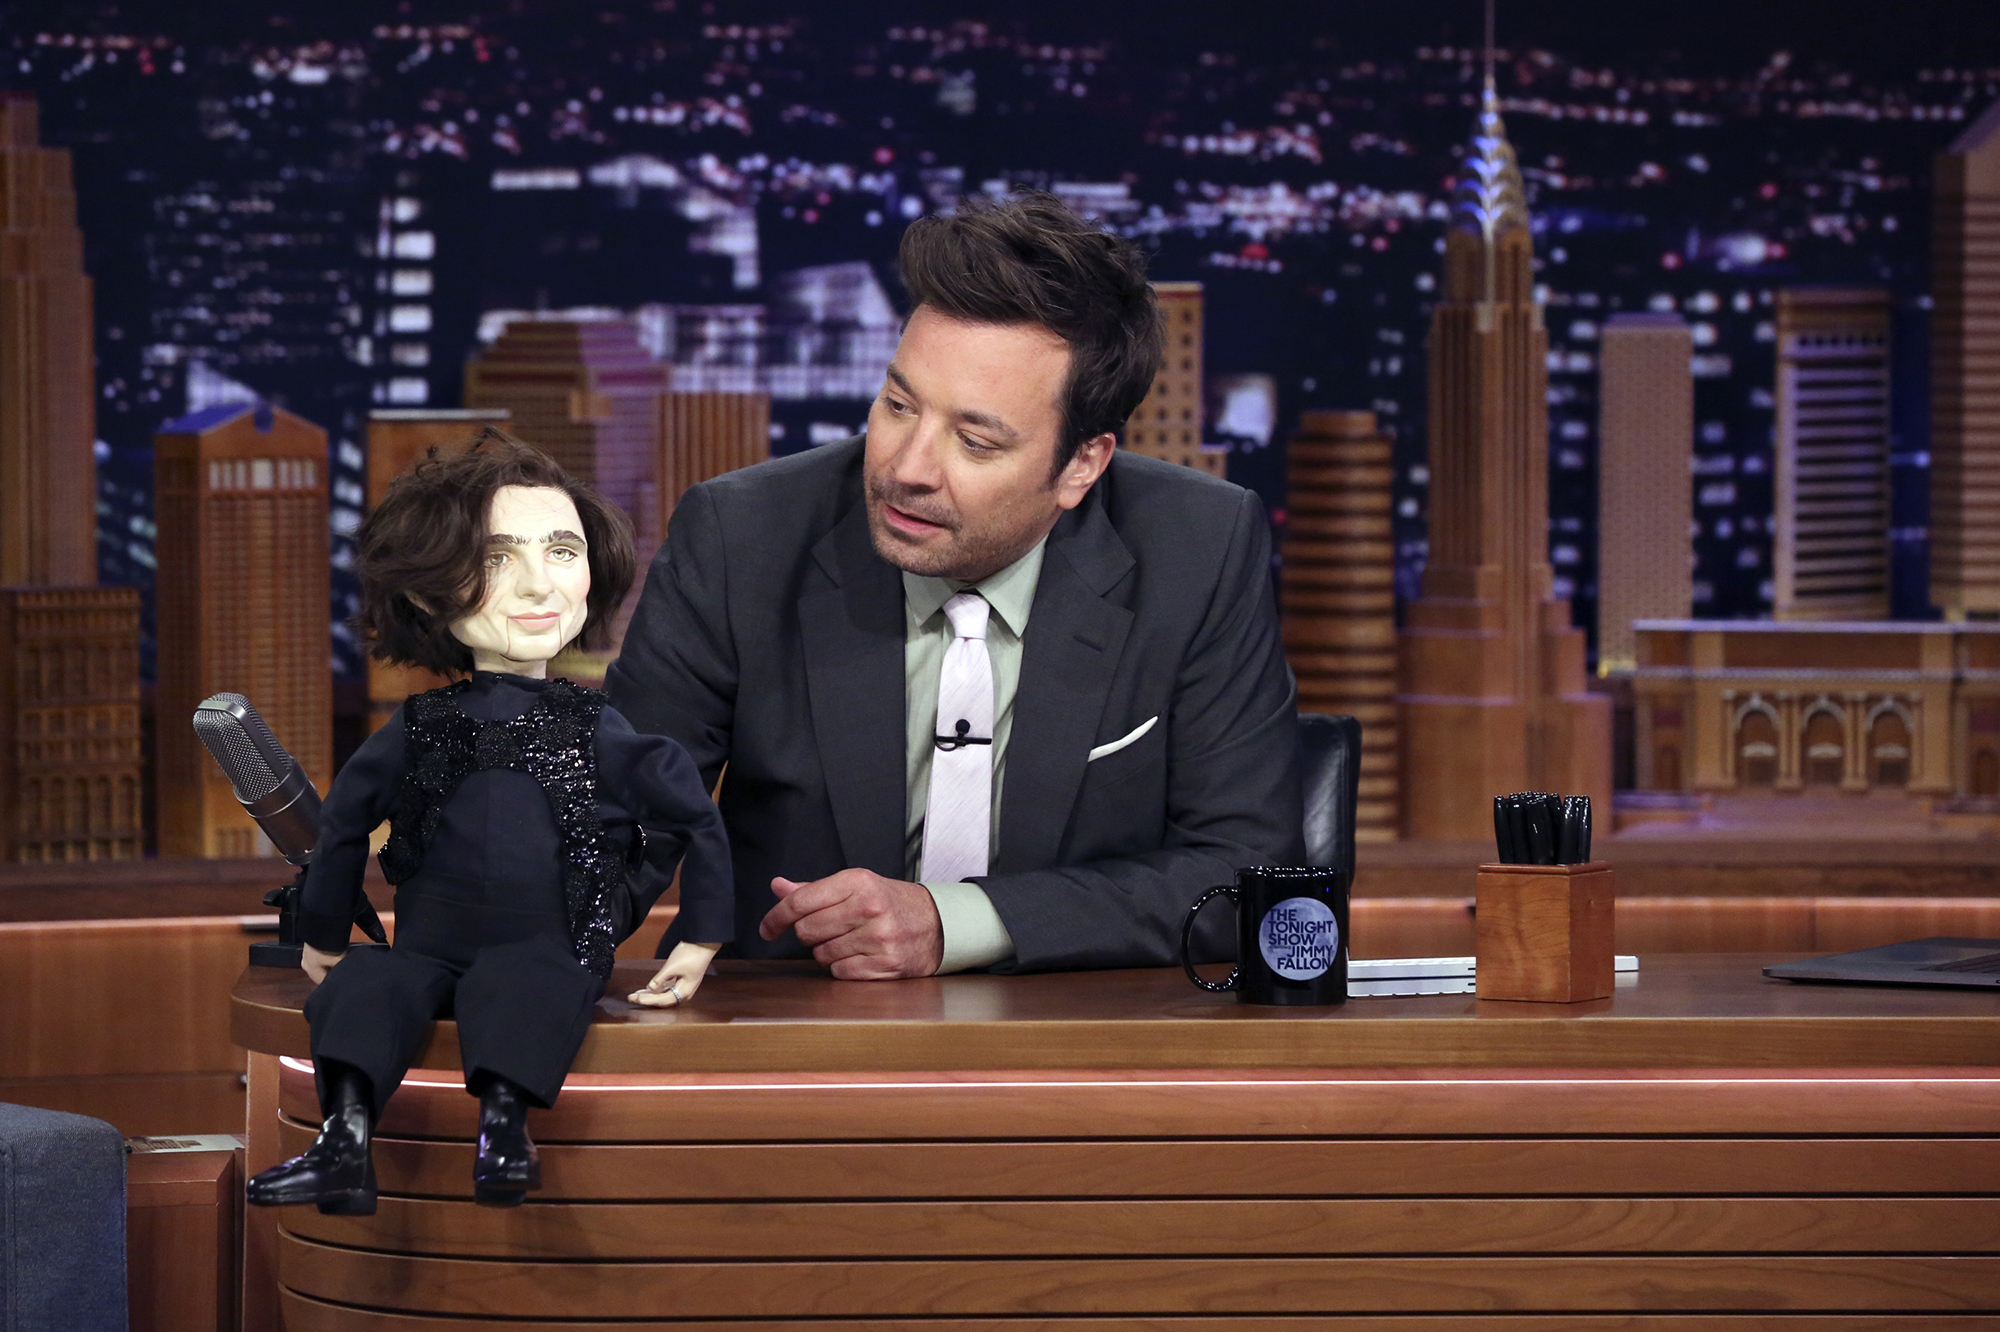

In [8]:
from IPython import display
display.Image("https://api.time.com/wp-content/uploads/2019/07/jimmy-fallon-timothee-chalamet-puppet.jpg")

#### Category ID

Napišimo funkciju koja crta histogram za `category_id`.

In [30]:
import matplotlib.pyplot as plt
def histogram(podaci):
    
    frekvencije_kategorija = []
    for i in range (0,43): frekvencije_kategorija.append(0) #inicijaliziramo listu u koju ćemo spremiti podatke
    
    for i in range(0,42): frekvencije_kategorija[i] = sum(podaci['category_id'] == i+1) #bilježimo frekvencije
    
    
histogram(podaciGB)

43 1


<AxesSubplot:ylabel='Frequency'>

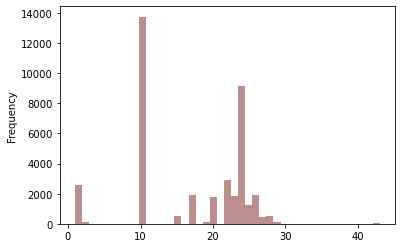

In [11]:
podaciGB['category_id'].plot.hist(bins=43, rwidth=1,color='rosybrown')

U `Correlations` dijelu gornje analize, vidimo da najveći (Pearsonovi) koeficijenti korelacije su između `likes` i `comment_count`, `likes` i `views`, i između `dislikes` i `comment_count`.

Ne bi nas trebalo iznenaditi to što izgleda da `category_id` nije u jakoj korelaciji ni sa jednom drugom kategorijom pošto on predstavlja *tip* videa.

In [26]:
podaciIN = pd.read_csv('INvideos.csv', encoding = 'utf-8')
podaciIN.drop(['video_id', 'title', 'publish_time', 'tags','thumbnail_link', 'comments_disabled','ratings_disabled','video_error_or_removed','description'],axis=1,inplace=True)
podaciIN.head()

trending_date    channel_title  category_id    views  likes  dislikes  \
0      17.14.11  Lokdhun Punjabi            1  1096327  33966       798   
1      17.14.11          HJ NEWS           25   590101    735       904   
2      17.14.11             TFPC           24   473988   2011       243   
3      17.14.11      Eruma Saani           23  1242680  70353      1624   
4      17.14.11       Filmylooks           24   464015    492       293   

   comment_count  
0            882  
1              0  
2            149  
3           2684  
4             66

In [27]:
podaciFR = pd.read_csv('FRvideos.csv', encoding = 'utf-8')
podaciFR.drop(['video_id', 'title', 'publish_time', 'tags','thumbnail_link', 'comments_disabled','ratings_disabled','video_error_or_removed','description'],axis=1,inplace=True)
podaciFR.head()

trending_date        channel_title  category_id   views  likes  dislikes  \
0      17.14.11  Le Raptor Dissident           24  212702  29282      1108   
1      17.14.11              Le Labo           24  432721  14053       576   
2      17.14.11      Daniil le Russe           23  482153  76203       477   
3      17.14.11    Joueur Du Grenier           20  925222  85016       550   
4      17.14.11    Aurelien Fontenoy           17  141695   8091        72   

   comment_count  
0           3817  
1           1161  
2           9580  
3           4303  
4            481

Vidimo po ulaznim podacima da se videi razlikuju od države do države. Odmah uočavamo da bi lako mogli zaključiti o kojoj se državi radi s obzirom na `title` videa.

## (Ne)zavisnost broja pregleda i broja lajkova

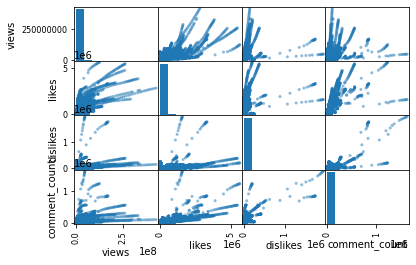

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(podaciGB[['views','likes','dislikes', 'comment_count']])
plt.show()

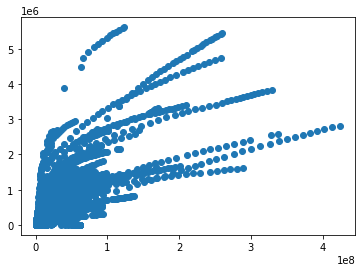

In [5]:
plt.plot(podaciGB['views'],podaciGB['likes'], 'o')

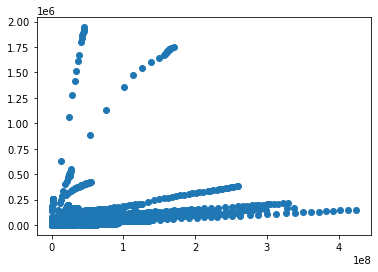

In [6]:
plt.plot(podaciGB['views'],podaciGB['dislikes'], 'o')

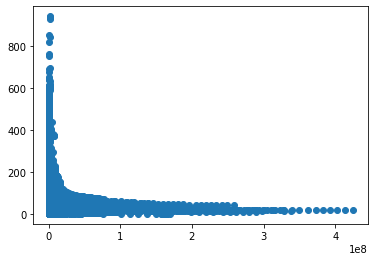

In [7]:
plt.plot(podaciGB['views'],podaciGB['likes']/podaciGB['dislikes'], 'o')

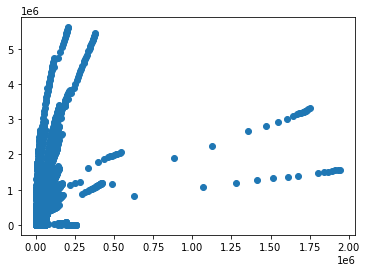

In [8]:
plt.plot(podaciGB['dislikes'],podaciGB['likes'], 'o')

## Frekvencije kategorija u pojedinoj državi

43 1


<AxesSubplot:ylabel='Frequency'>

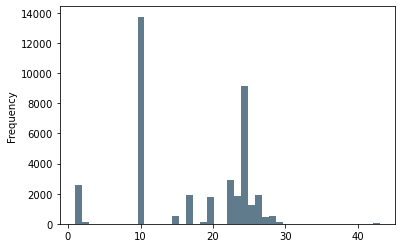

In [10]:
print(max(podaciGB['category_id']),min(podaciGB['category_id']))
podaciGB['category_id'].plot.hist(bins=44, rwidth=1,color='#607c8c')

<AxesSubplot:ylabel='Frequency'>

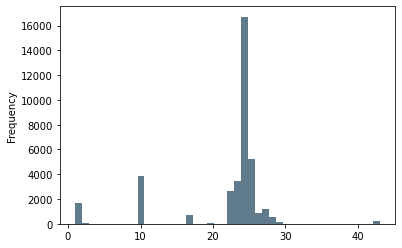

In [11]:
podaciIN['category_id'].plot.hist(bins=44, rwidth=1,color='#607c8c')

<AxesSubplot:ylabel='Frequency'>

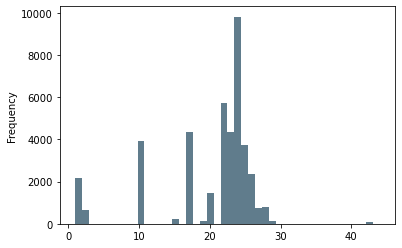

In [12]:
podaciFR['category_id'].plot.hist(bins=44, rwidth=1,color='#607c8c')

## PewDiePie vs. T-Series

In [13]:
print(sum(podaciGB['channel_title']=='PewDiePie'))
print(sum(podaciGB['channel_title']=='T-Series'))

152
0


In [14]:
print(sum(podaciIN['channel_title']=='PewDiePie'))
print(sum(podaciIN['channel_title']=='T-Series'))

85
221


In [15]:
print(sum(podaciFR['channel_title']=='PewDiePie'))
print(sum(podaciFR['channel_title']=='T-Series'))

71
7


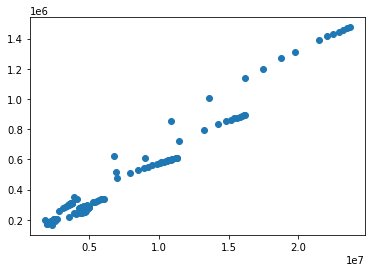

In [23]:
import numpy as np
podaciGB.loc[podaciGB['channel_title'] == 'PewDiePie','views']
xGB = podaciGB.loc[podaciGB['channel_title'] == 'PewDiePie','views']
yGB = podaciGB.loc[podaciGB['channel_title'] == 'PewDiePie','likes']
plt.plot(xGB, yGB, 'o')

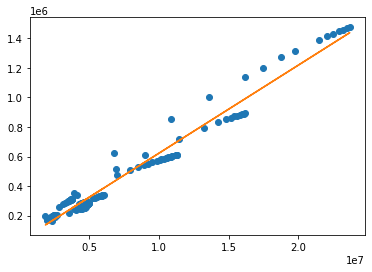

In [24]:
plt.plot(xGB, yGB, 'o')
kGB, lGB= np.polyfit(xGB, yGB, 1)
plt.plot(xGB, kGB*xGB + lGB)

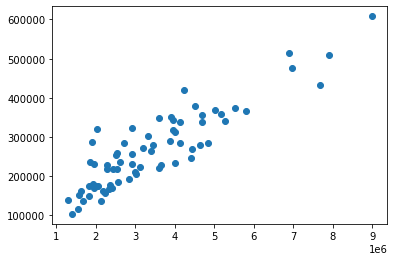

In [25]:
podaciFR.loc[podaciFR['channel_title'] == 'PewDiePie','views']
xFR = podaciFR.loc[podaciFR['channel_title'] == 'PewDiePie','views']
yFR = podaciFR.loc[podaciFR['channel_title'] == 'PewDiePie','likes']
plt.plot(xFR,yFR, 'o')

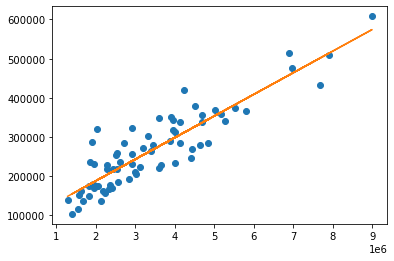

In [26]:
plt.plot(xFR, yFR, 'o')
kFR, lFR= np.polyfit(xFR, yFR, 1)
plt.plot(xFR, kFR*xFR + lFR)

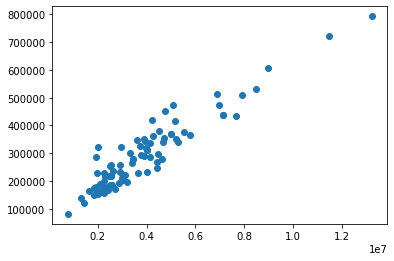

In [27]:
podaciIN.loc[podaciIN['channel_title'] == 'PewDiePie','views']
xIN = podaciIN.loc[podaciIN['channel_title'] == 'PewDiePie','views']
yIN = podaciIN.loc[podaciIN['channel_title'] == 'PewDiePie','likes']
plt.plot(xIN,yIN, 'o')

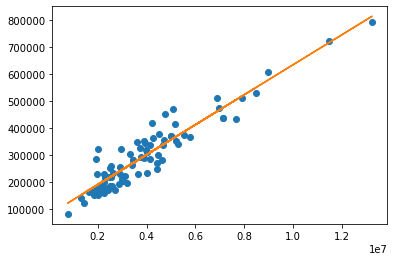

In [28]:
plt.plot(xIN, yIN, 'o')
kIN, lIN= np.polyfit(xIN, yIN, 1)
plt.plot(xIN, kIN*xIN + lIN)

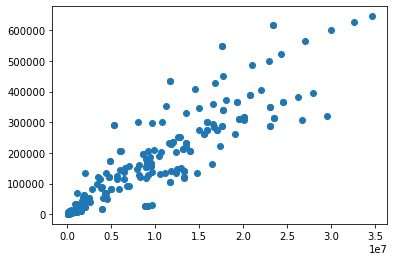

In [29]:
podaciIN.loc[podaciIN['channel_title'] == 'T-Series','views']
x = podaciIN.loc[podaciIN['channel_title'] == 'T-Series','views']
y = podaciIN.loc[podaciIN['channel_title'] == 'T-Series','likes']
plt.plot(x,y, 'o')

# Literatura

https://www.kaggle.com/datasnaek/youtube-new

https://gist.github.com/dgp/1b24bf2961521bd75d6c

https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3